# Talent Paul

<div class = 'alert alert-info'>
    Please look out for colored cells for my notes.
   </div>

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting

In [10]:
#Dealing with errors
import warnings
warnings.filterwarnings('ignore')

In [11]:
### Loading the data
Train = pd.read_csv("../AMP Data Sets/AMP_TrainSet.csv")
Test = pd.read_csv("../AMP Data Sets/Test.csv")
Train.head(5)

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.000,0.951,74.842,0.975,-3.663,0,0.282,73.444,5.661,1.041,1
1,4.0,5.405,0.931,71.595,0.957,-4.011,1,0.600,68.222,6.537,1.453,1
2,5.5,5.405,0.873,73.595,0.961,-2.512,0,0.593,69.444,4.934,1.722,1
3,5.0,4.167,0.895,66.250,0.999,-1.362,0,0.614,67.222,4.316,1.382,1
4,7.5,8.537,0.932,64.720,0.979,-2.091,0,0.616,72.944,4.540,1.539,1


In [12]:
# checking the dimensions of your data
#This returns the number of rows and columns

Train.shape


(3038, 12)

In [13]:
#Looking for null values in each colum
Train.isnull().sum()

FULL_Charge           0
FULL_AcidicMolPerc    0
FULL_AURR980107       0
FULL_DAYM780201       0
FULL_GEOR030101       0
FULL_OOBM850104       0
NT_EFC195             0
AS_MeanAmphiMoment    0
AS_DAYM780201         0
AS_FUKS010112         0
CT_RACS820104         0
CLASS                 0
dtype: int64

In [14]:
##Exploring the data and it's data types
Train.dtypes

FULL_Charge           float64
FULL_AcidicMolPerc    float64
FULL_AURR980107       float64
FULL_DAYM780201       float64
FULL_GEOR030101       float64
FULL_OOBM850104       float64
NT_EFC195               int64
AS_MeanAmphiMoment    float64
AS_DAYM780201         float64
AS_FUKS010112         float64
CT_RACS820104         float64
CLASS                   int64
dtype: object

In [15]:
#descriptive statistics
Train.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


In [16]:
#Correlation
Train.corr(method='pearson')

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
FULL_Charge,1.000000,-0.612996,-0.490977,-0.434603,-0.058725,-0.283758,0.088068,0.355477,-0.365374,-0.090570,0.232929,0.534602
FULL_AcidicMolPerc,-0.612996,1.000000,0.794796,0.541481,0.115201,0.513344,-0.143168,-0.431590,0.449621,0.002334,-0.213543,-0.598816
FULL_AURR980107,-0.490977,0.794796,1.000000,0.548253,0.346139,0.462712,-0.169540,-0.426097,0.456260,0.032958,-0.403599,-0.584111
FULL_DAYM780201,-0.434603,0.541481,0.548253,1.000000,0.010118,0.334778,-0.090058,-0.408793,0.894191,0.055915,-0.326792,-0.554838
FULL_GEOR030101,-0.058725,0.115201,0.346139,0.010118,1.000000,0.319157,-0.230417,-0.160269,-0.029085,0.040480,-0.151935,-0.260470
FULL_OOBM850104,-0.283758,0.513344,0.462712,0.334778,0.319157,1.000000,-0.230561,-0.336297,0.275640,-0.452769,0.155304,-0.453287
NT_EFC195,0.088068,-0.143168,-0.169540,-0.090058,-0.230417,-0.230561,1.000000,0.178683,-0.036844,0.145924,0.080898,0.260702
AS_MeanAmphiMoment,0.355477,-0.431590,-0.426097,-0.408793,-0.160269,-0.336297,0.178683,1.000000,-0.322378,0.025580,0.171524,0.693552
AS_DAYM780201,-0.365374,0.449621,0.456260,0.894191,-0.029085,0.275640,-0.036844,-0.322378,1.000000,0.045562,-0.256060,-0.437168
AS_FUKS010112,-0.090570,0.002334,0.032958,0.055915,0.040480,-0.452769,0.145924,0.025580,0.045562,1.000000,-0.445284,0.033432


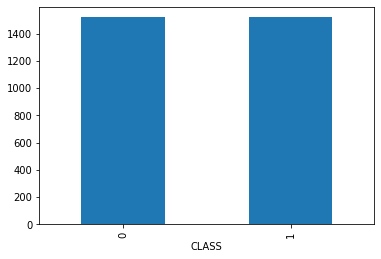

In [17]:
#Classification
Train.groupby('CLASS').size().plot(kind='bar')


<div class = 'alert alert-danger'>
    I asked specifically for each of us to write their thoughts down specifically on what they are doing at each stage.
    
   You are not doing a good job documenting your work with mark down.
   

#The distribution of 0 and 1 is the same

In [18]:
#Looking at the correlation of "CLASS" with other attributes
Train.corr()['CLASS']

FULL_Charge           0.534602
FULL_AcidicMolPerc   -0.598816
FULL_AURR980107      -0.584111
FULL_DAYM780201      -0.554838
FULL_GEOR030101      -0.260470
FULL_OOBM850104      -0.453287
NT_EFC195             0.260702
AS_MeanAmphiMoment    0.693552
AS_DAYM780201        -0.437168
AS_FUKS010112         0.033432
CT_RACS820104         0.267652
CLASS                 1.000000
Name: CLASS, dtype: float64

# Data With Visualization

<Figure size 3600x3600 with 0 Axes>

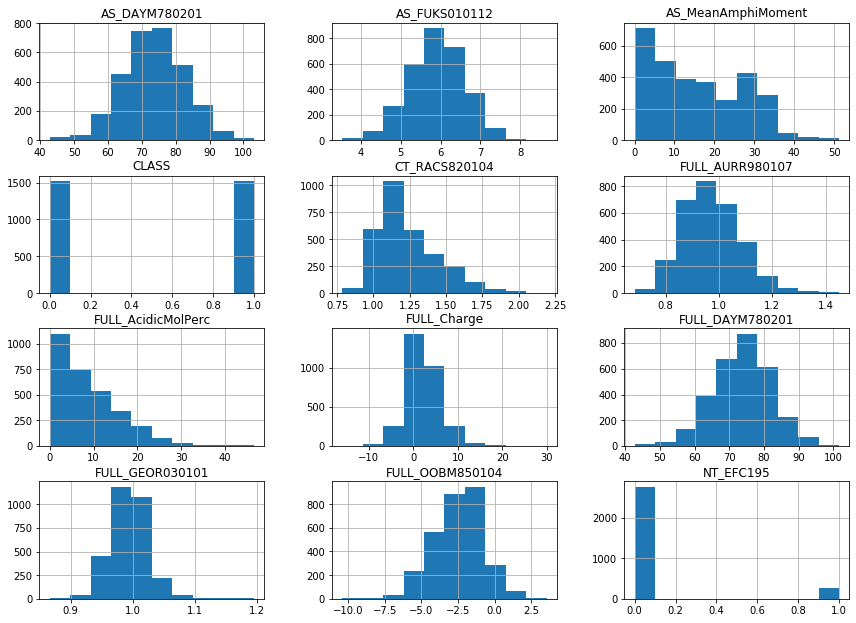

In [19]:
#Univariate Plot
plt.figure(figsize=(50,50))
Train.hist()
plt.subplots_adjust(bottom=1,right=2,top=3)
plt.show()

# Density Plots

### Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin

<div class = 'alert alert-danger'>

## ??

What did you learn from the plots?

<function matplotlib.pyplot.show(*args, **kw)>

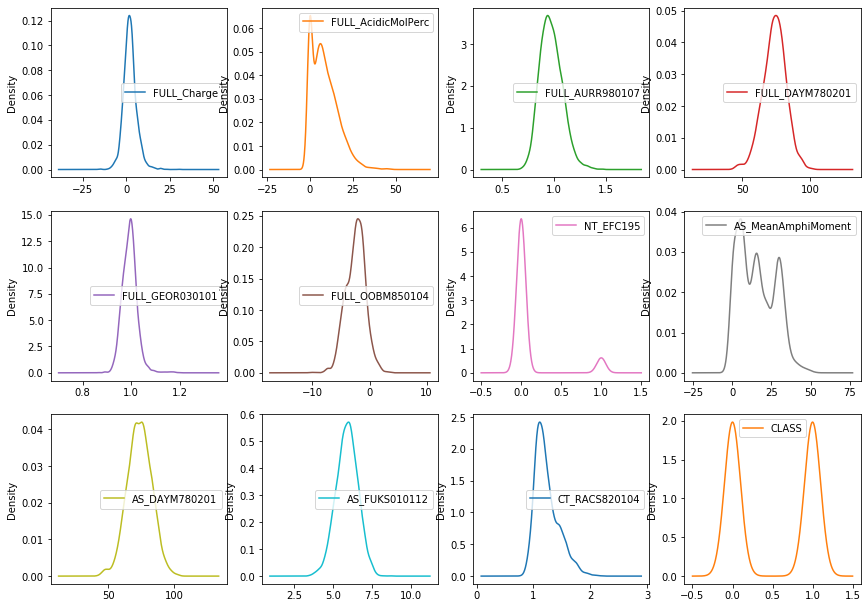

In [20]:
Train.plot(kind='density', subplots=True, layout=(3,4), sharex=False)
plt.subplots_adjust(bottom=1,right=2,top=3)
plt.show

#### Box and Whisker Plots

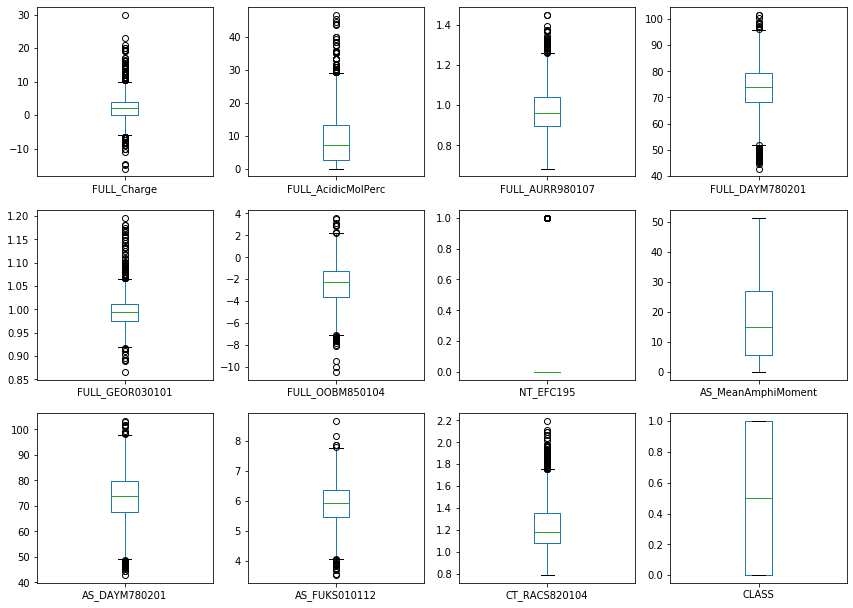

In [21]:
Train.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.subplots_adjust(bottom=1,right=2,top=3)
plt.show()

<div class = 'alert alert-danger'>
Please your visual, is compact, the labels on the upper axis are overlapping, can you try a different library to plot this if you are having a hard time with matplotlib?

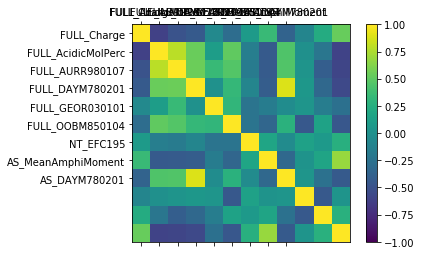

In [22]:
#Multivariate Plot
correlations = Train.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(Train.columns)
ax.set_yticklabels(Train.columns)
plt.show()

## Scatter plot

<div class = 'alert alert-danger'>

## ??

What are you trying to learn with the plots below? 
Its not compulsory to do a pair plot if you are not trying to inform specific decisions.

Please plot only those that you are interested in they could be 2 or 3 that have caught your eye.

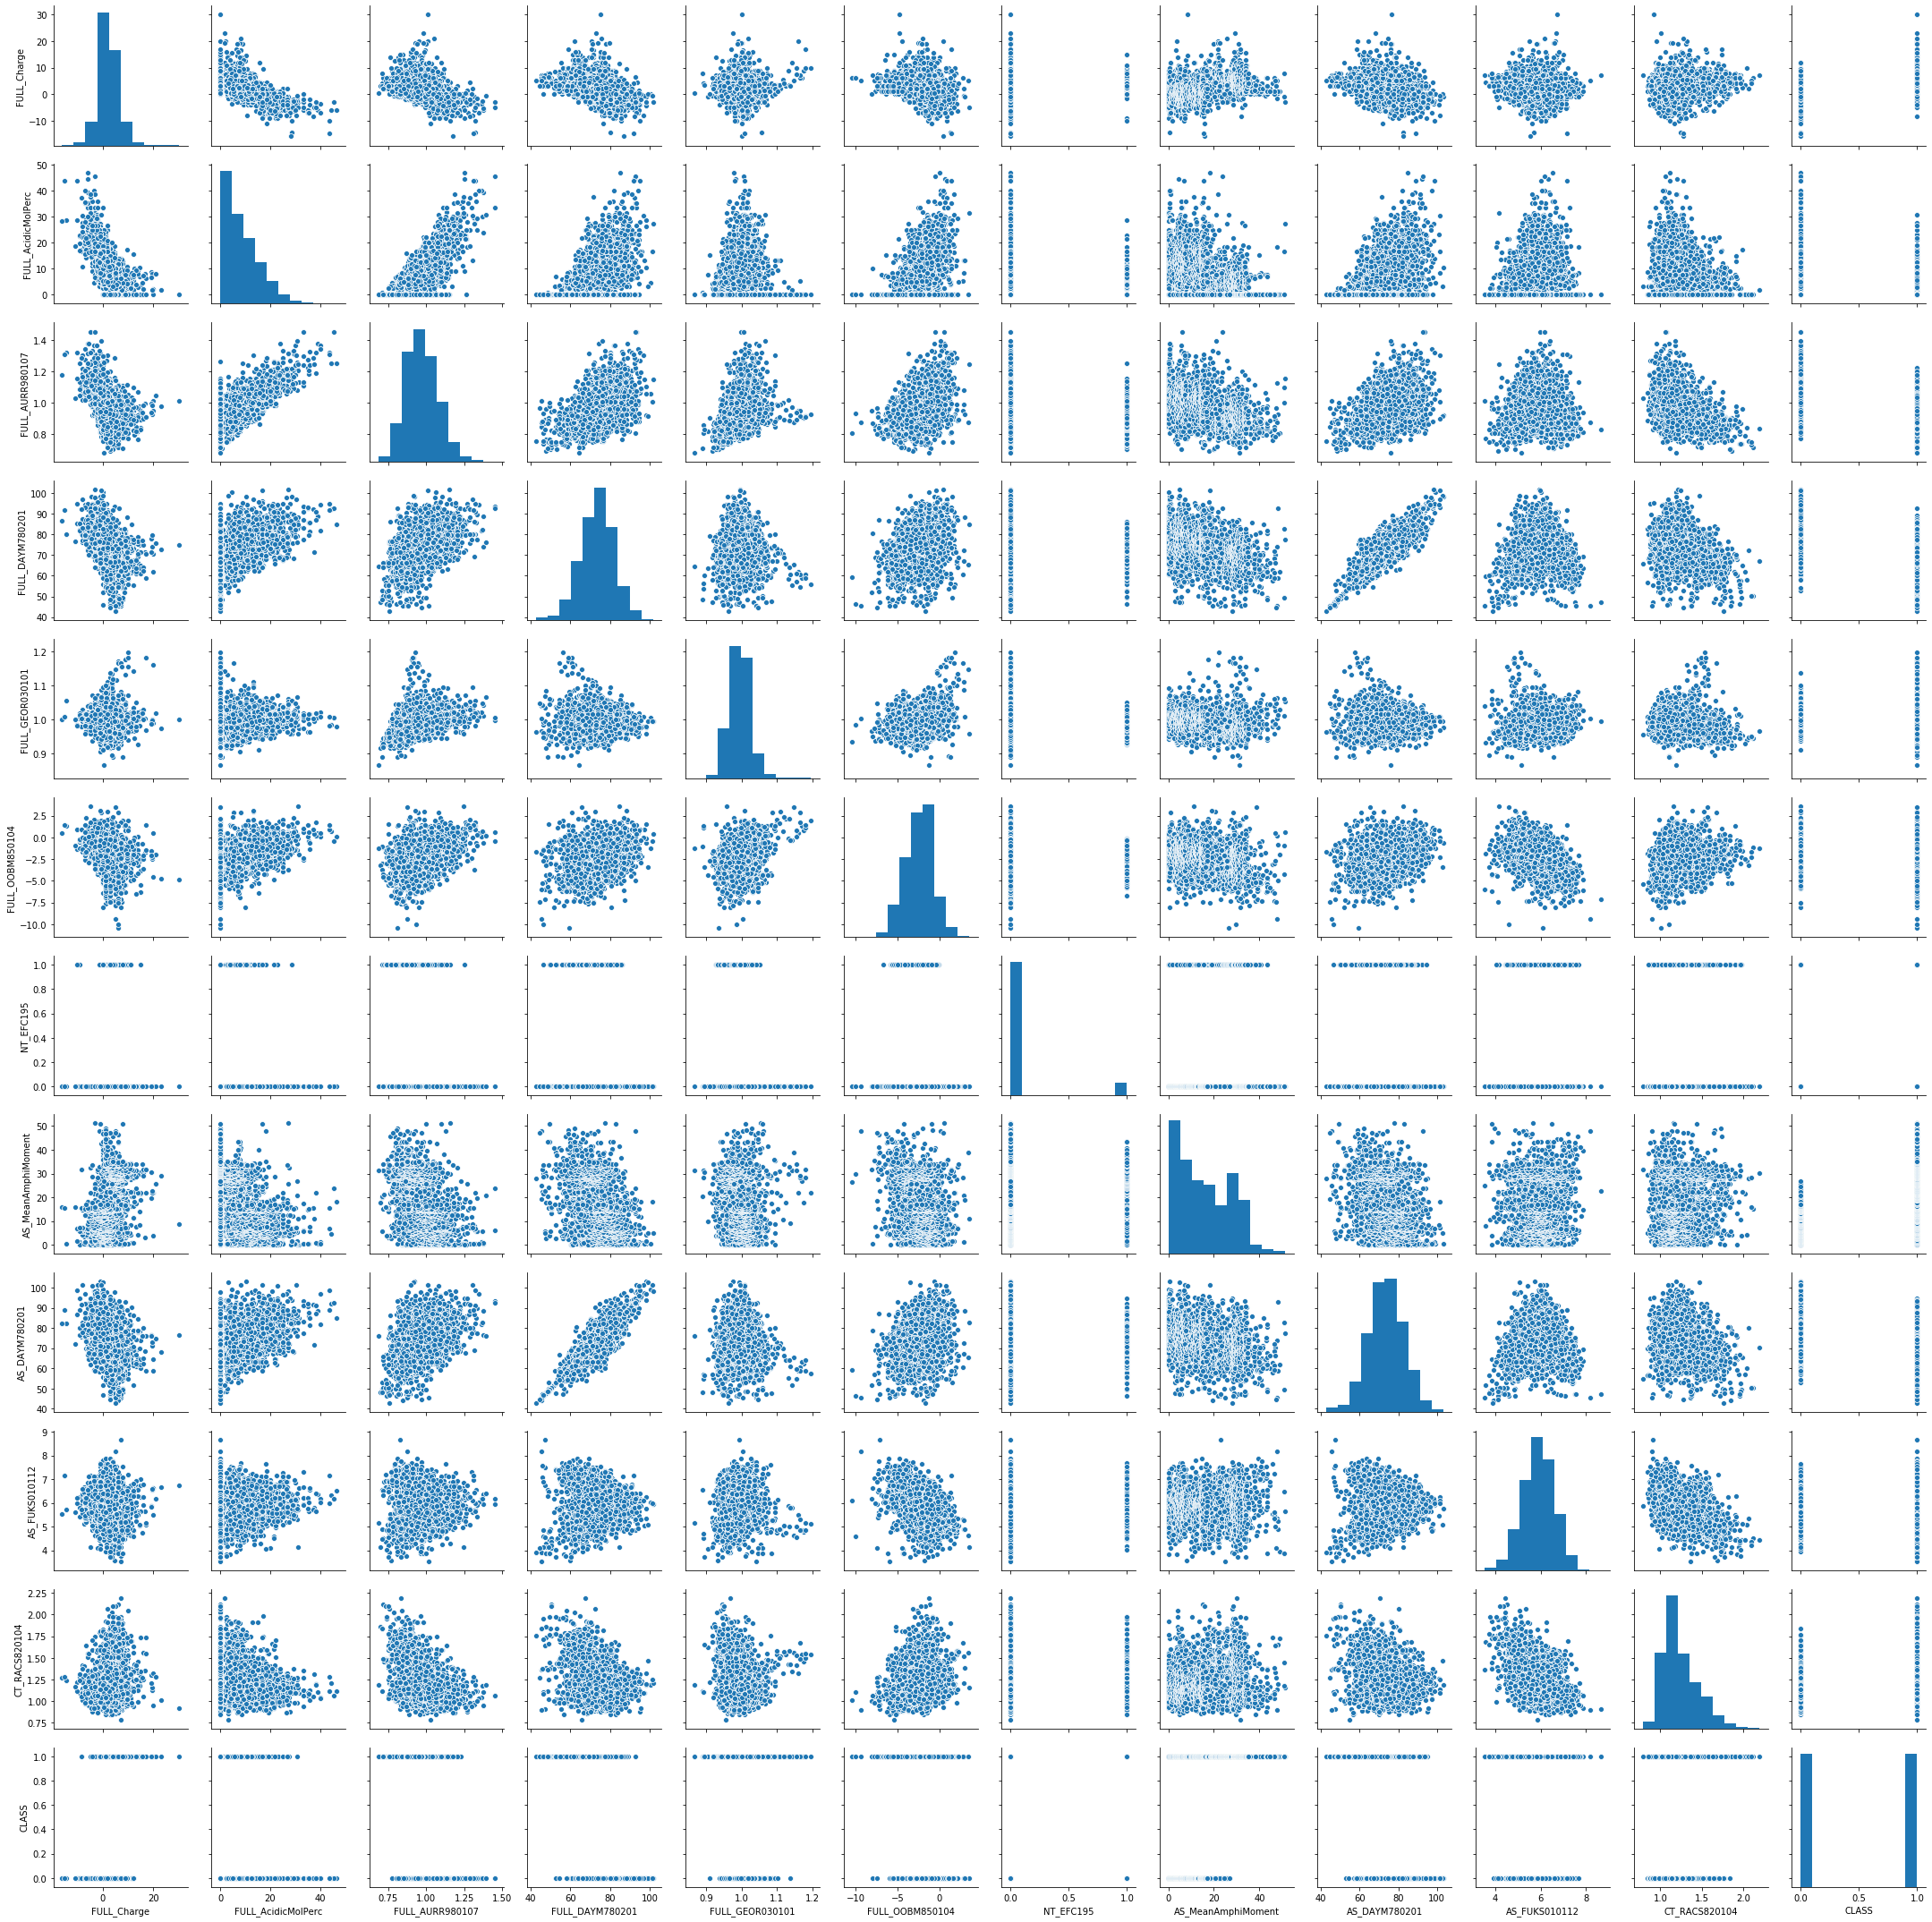

In [23]:
#Scatter Plot Matrix
#A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute
import seaborn as sns
#sns.set(style="ticks")
sns.pairplot(Train)

# Preparing data for machine learning

<div class = 'alert alert-danger'>

## ??

# Feature selection

In [24]:
##Rescaling 
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

###rescaling the data
array = Train.values
# separate array into input and output components
X = array[:,0:11]
Y = array[:,11]

##Scaling the data so that it's within the range of 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3) #number of decimal points
print(rescaledX[0:11,:])

[[0.457 0.    0.348 0.545 0.33  0.483 0.    0.005 0.508 0.415 0.182]
 [0.435 0.116 0.322 0.489 0.276 0.458 1.    0.011 0.421 0.586 0.475]
 [0.467 0.116 0.246 0.523 0.288 0.565 0.    0.011 0.442 0.273 0.666]
 [0.457 0.089 0.275 0.399 0.403 0.647 0.    0.011 0.405 0.153 0.424]
 [0.511 0.183 0.323 0.373 0.342 0.595 0.    0.011 0.5   0.196 0.536]
 [0.457 0.165 0.451 0.614 0.333 0.524 1.    0.009 0.596 0.479 0.217]
 [0.413 0.148 0.321 0.608 0.276 0.492 1.    0.007 0.587 0.536 0.485]
 [0.391 0.126 0.24  0.574 0.252 0.328 0.    0.002 0.56  0.574 0.214]
 [0.5   0.056 0.226 0.3   0.442 0.724 0.    0.003 0.357 0.062 0.81 ]
 [0.543 0.    0.296 0.391 0.555 0.467 0.    0.006 0.339 0.545 0.306]
 [0.391 0.074 0.4   0.482 0.376 0.48  0.    0.009 0.557 0.364 0.355]]


In [25]:
#feature selection using recursive feature elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 4)

#I tried to test for the performance of the model with more features and the results hardly changed.
#I used 11 then 7,and finally 4 features. I selected the features ranndomly.
#As a trade off for faster performance , I decided to go with 4 features.

#Accuracy at 11 =91.72482552342971
#Accuracy at 7 =91.72482552342971
#Accuracy at 4 =91.72482552342971

#I chose RFE because it eliminates worst performing features
fit = rfe.fit(rescaledX, Y)
print("Num Features: ",  fit.n_features_)
print("Selected Features:",  fit.support_)
print("Feature Ranking: ",  fit.ranking_)

Num Features:  4
Selected Features: [ True  True False  True False False False  True False False False]
Feature Ranking:  [1 1 4 1 2 3 5 1 7 8 6]


In [26]:
rescaledX[:,fit.support_] #extracting features of interest



array([[0.457, 0.   , 0.545, 0.005],
       [0.435, 0.116, 0.489, 0.011],
       [0.467, 0.116, 0.523, 0.011],
       ...,
       [0.315, 0.268, 0.573, 0.329],
       [0.391, 0.107, 0.526, 0.334],
       [0.326, 0.338, 0.397, 0.334]])

# Algorithms

In [27]:
###### Used on rescaled data
#Using Logistic Regression
#Splitting data into Train and Test Sets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

test_size = 0.33 #Size of the test data
seed = 7
rescaledX_train, rescaledX_test, Y_train, Y_test = train_test_split(rescaledX, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression() #Using Logistic Regression
model.fit(rescaledX_train, Y_train)
result = model.score(rescaledX_test, Y_test)
print("Accuracy: ",  (result*100.0))

Accuracy:  91.72482552342971


In [28]:
###Algorithm used on unscaled data
#Using Logistic Regression
#Splitting data into Train and Test Sets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

array = Train.values
X = array[:,0:11]
Y = array[:,11]
test_size = 0.33 #Size of the test data
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression() #Using Logistic Regression
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))

Accuracy:  91.92422731804587


# Rescaled data gives accuracy of 91.72482552342971 and un scaled data with all the features gives 91.92422731804587. I have used unscaled data for the rest of the algorithms down

In [29]:
##Use the test dataset to see how the aligorithm is performing
out = model.predict(Test.values)

out1 = pd.DataFrame(out) #Converting to data frame
out1.columns=["CLASS"] #Naming the column
out1.index.name="Index" #Creating a column index
out1["CLASS"]=out1["CLASS"].map({0.0:False,1.0:True}) # Chaninging 0 to "False" 1 to "True"

out1.to_csv("talz_csv3") ## Writing a csv file
print(out1['CLASS'].unique())
print(out1['CLASS'].nunique())

#printing the numbers of False and True
print(out1.groupby('CLASS').size()[0].sum()) #
print(out1.groupby('CLASS').size()[1].sum()) 

[False  True]
2
383
375


In [30]:
###Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
array = Train.values
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
model.fit(X, Y)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.880815746048289


In [31]:
##Use the test dataset to see how the aligorithm is performing
f = model.predict(Test.values)

f1 = pd.DataFrame(f) #Converting to data frame
f1.columns=["CLASS"] #Naming the column
f1.index.name="Index" #Creating a column index
f1["CLASS"]=f1["CLASS"].map({0.0:False,1.0:True}) # Chaninging 0 to "False" 1 to "True"

f1.to_csv("talz_csv8") ## Writing a csv file
print(f1['CLASS'].unique())
print(f1['CLASS'].nunique())

#printing the numbers of False and True
print(f1.groupby('CLASS').size()[0].sum()) #
print(f1.groupby('CLASS').size()[1].sum()) 

[ True False]
2
370
388


## Classiffication and Regression Trees

In [32]:
#Classiffication and Regression Trees
from sklearn.tree import DecisionTreeClassifier
array = Train.values
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
model.fit(X, Y)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7299407243355915


In [33]:
fd = model.predict(Test.values)

fd1 = pd.DataFrame(fd) #Converting to data frame
fd1.columns=["CLASS"] #Naming the column
fd1.index.name="Index" #Creating a column index
fd1["CLASS"]=fd1["CLASS"].map({0.0:False,1.0:True}) # Chaninging 0 to "False" 1 to "True"

fd1.to_csv("talz_csv9") ## Writing a csv file
print(fd1['CLASS'].unique())
print(fd1['CLASS'].nunique())

#printing the numbers of False and True
print(fd1.groupby('CLASS').size()[0].sum()) #
print(fd1.groupby('CLASS').size()[1].sum()) 

[ True False]
2
385
373


# Support Vector Machines (SVM)

In [34]:
from sklearn.svm import SVC

array = Train.values
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
model.fit(X, Y)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

svm = model.predict(Test.values)

svm1 = pd.DataFrame(svm) #Converting to data frame
svm1.columns=["CLASS"] #Naming the column
svm1.index.name="Index" #Creating a column index
svm1["CLASS"]=svm1["CLASS"].map({0.0:False,1.0:True}) # Chaninging 0 to "False" 1 to "True"

svm1.to_csv("talz_csv10") ## Writing a csv file
print(svm1['CLASS'].unique())
print(svm1['CLASS'].nunique())

#printing the numbers of False and True
print(svm1.groupby('CLASS').size()[0].sum()) #
print(svm1.groupby('CLASS').size()[1].sum()) 

0.8350280093798853
[False  True]
2
397
361


### Linear Discriminant Analysis

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

array = Train.values
X = array[:,0:11]
Y = array[:,11]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8535044293903076


## K-Nearest Neighbors

In [36]:
from sklearn.neighbors import KNeighborsRegressor

array = Train.values
X = array[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-0.16489729894042035


### Ridge Regression

In [37]:
from sklearn.linear_model import Ridge

array = Train.values
X = array[:,0:11]
Y = array[:,11]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-0.11583526542366822


### Random Forest

In [38]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
array = Train.values

X = array[:,0:11]
Y = array[:,11]

num_trees = 1000

max_features = 3

kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8087013635574085


### Stochastic Gradient Descent - SGD

In [39]:

# Stochastic Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

array = Train.values

X = array[:,0:11]
Y = array[:,11]

seed = 7
num_trees = 100

kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7882935990967518


## XGB

In [40]:
# Stochastic X Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

array = Train.values

X = array[:,0:11]
Y = array[:,11]

seed = 7
num_trees = 100

kfold = KFold(n_splits=10, random_state=seed)
model = XGBClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.787307842626368


In [ ]:
# Comparinr the  Algorithms used
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# load dataset

array = Train.values

#split the dataset 
X = array[:,0:11]
Y = array[:,11]

# prepare models and add them to a list
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Naive Bayes gives the best accuarcy

<div class = 'alert alert-danger'>
    
   ## Final thoughts

You are not doing a good job in documenting your work. Please improve in your report.

You can talk to your friend and see how they are doing their reports on the work they are doing.

- I need to know what you are thinking at each step, a description of the concept e.t.c
- Your explanation should be coherent, meaning, I need to see that you understand what you are doing, and if you don't also document that.